## Alfredo Winston - 2702297776

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from warnings import filterwarnings
filterwarnings('ignore')

### Overview Data

In [2]:
df = pd.read_csv('AP003.csv')

df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,2023-03-31 19:00:00,2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50396,2023-03-31 20:00:00,2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50397,2023-03-31 21:00:00,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50398,2023-03-31 22:00:00,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

### Checking Missing Values per Column

In [4]:
df.isnull().sum()

From Date             0
To Date               0
PM2.5 (ug/m3)      5709
PM10 (ug/m3)       5382
NO (ug/m3)         4148
NO2 (ug/m3)        4695
NOx (ppb)          3360
NH3 (ug/m3)        4644
SO2 (ug/m3)        6796
CO (mg/m3)         3407
Ozone (ug/m3)      5091
Benzene (ug/m3)    3722
Toluene (ug/m3)    3722
Temp (degree C)    4065
RH (%)             3880
WS (m/s)           3878
WD (degree)        5690
SR (W/mt2)         3355
BP (mmHg)          6720
VWS (m/s)          3357
AT (degree C)      4030
RF (mm)            3252
Xylene (ug/m3)     3742
dtype: int64

In [5]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
count,44691.000000,45018.000000,46252.000000,45705.000000,47040.000000,45756.000000,43604.000000,46993.000000,45309.000000,46678.000000,...,46335.000000,46520.000000,46522.000000,44710.000000,47045.000000,43680.000000,47043.000000,46370.000000,47148.000000,46658.000000
mean,46.869591,111.938589,14.817678,34.921808,29.857413,13.813287,12.323789,0.666865,29.118732,3.309707,...,29.408316,73.166650,1.895205,209.078558,127.619004,746.903387,0.017120,27.591552,0.022934,2.649006
std,35.201161,74.285923,22.372042,23.912796,27.042412,14.685377,10.266289,0.550187,29.388645,2.926522,...,3.228845,8.592562,1.199727,67.168061,175.790733,7.656193,0.071902,4.426638,0.282441,8.785483
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,5.180000,0.000000,0.000000
25%,23.415000,63.330000,2.915000,18.400000,12.670000,7.050000,6.350000,0.330000,9.930000,1.500000,...,27.900000,68.000000,0.880000,157.250000,6.250000,743.000000,0.000000,24.830000,0.000000,0.570000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,27.650000,0.000000,1.300000
75%,62.330000,137.500000,17.300000,43.900000,36.930000,16.770000,15.520000,0.890000,37.680000,4.380000,...,30.180000,79.670000,2.730000,262.670000,227.500000,751.000000,0.050000,30.400000,0.000000,2.770000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,48.500000,12.500000,410.850000


### Checking Duplicated Data

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah Duplicate Data: {duplicate_count}")

Jumlah Duplicate Data: 0


### Fill Missing Values with Interpolate

In [7]:
df.interpolate(method='linear', inplace = True)

In [8]:
df.isnull().sum()

From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        1
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      3
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
AT (degree C)      0
RF (mm)            0
Xylene (ug/m3)     0
dtype: int64

In [9]:
df = df.dropna()

df.isnull().sum()

From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (degree)        0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
AT (degree C)      0
RF (mm)            0
Xylene (ug/m3)     0
dtype: int64

In [10]:
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.000000,51.638889,2.58,6.380000,5.300000,0.125000,19.780000,1.580000,...,58.930000,86.0,1.550000,302.500000,6.00,735.000000,0.08,24.100000,0.0,0.630000
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.250000,47.833333,5.30,21.030000,15.470000,0.150000,22.400000,2.250000,...,59.880000,86.0,2.300000,297.250000,6.00,735.000000,0.08,24.900000,0.0,0.670000
5,2017-07-01 05:00:00,2017-07-01 06:00:00,32.670000,44.027778,2.30,26.630000,16.030000,0.115000,19.270000,2.600000,...,59.714000,86.0,2.570000,292.000000,9.67,735.670000,0.10,24.530000,0.0,0.630000
6,2017-07-01 06:00:00,2017-07-01 07:00:00,27.750000,40.222222,3.83,15.580000,11.280000,0.080000,21.880000,1.020000,...,59.548000,86.0,1.930000,305.500000,26.75,736.000000,0.08,24.600000,0.0,0.700000
7,2017-07-01 07:00:00,2017-07-01 08:00:00,38.000000,36.416667,4.25,24.930000,16.700000,3.586667,13.980000,1.640000,...,59.382000,86.0,2.650000,311.000000,47.75,737.750000,0.05,24.970000,0.0,0.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,2023-03-31 19:00:00,2023-03-31 20:00:00,11.474286,48.428571,17.10,27.433333,28.533333,12.733333,7.533333,0.263333,...,27.966667,76.0,2.233333,298.666667,34.00,746.333333,0.00,29.366667,0.0,0.266667
50396,2023-03-31 20:00:00,2023-03-31 21:00:00,10.855714,47.571429,17.90,29.000000,30.050000,12.600000,9.250000,0.395000,...,27.950000,76.5,2.250000,306.000000,27.50,746.500000,0.00,29.050000,0.0,0.300000
50397,2023-03-31 21:00:00,2023-03-31 22:00:00,10.237143,46.714286,18.70,30.566667,31.566667,12.466667,10.966667,0.526667,...,27.933333,77.0,2.266667,313.333333,21.00,746.666667,0.00,28.733333,0.0,0.333333
50398,2023-03-31 22:00:00,2023-03-31 23:00:00,9.618571,45.857143,19.50,32.133333,33.083333,12.333333,12.683333,0.658333,...,27.916667,77.5,2.283333,320.666667,14.50,746.833333,0.00,28.416667,0.0,0.366667


### Set Index From Date

In [11]:
df['From Date'] = pd.to_datetime(df['From Date'])

In [12]:
df.set_index('From Date', inplace=True)

In [13]:
df.sort_index(inplace=True)

In [14]:
df.drop(columns=['To Date'], inplace=True)
df

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
From Date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 03:00:00,8.000000,51.638889,2.58,6.380000,5.300000,0.125000,19.780000,1.580000,144.420,0.750000,...,58.930000,86.0,1.550000,302.500000,6.00,735.000000,0.08,24.100000,0.0,0.630000
2017-07-01 04:00:00,33.250000,47.833333,5.30,21.030000,15.470000,0.150000,22.400000,2.250000,42.650,0.780000,...,59.880000,86.0,2.300000,297.250000,6.00,735.000000,0.08,24.900000,0.0,0.670000
2017-07-01 05:00:00,32.670000,44.027778,2.30,26.630000,16.030000,0.115000,19.270000,2.600000,15.370,1.170000,...,59.714000,86.0,2.570000,292.000000,9.67,735.670000,0.10,24.530000,0.0,0.630000
2017-07-01 06:00:00,27.750000,40.222222,3.83,15.580000,11.280000,0.080000,21.880000,1.020000,0.300,2.030000,...,59.548000,86.0,1.930000,305.500000,26.75,736.000000,0.08,24.600000,0.0,0.700000
2017-07-01 07:00:00,38.000000,36.416667,4.25,24.930000,16.700000,3.586667,13.980000,1.640000,38.615,3.080000,...,59.382000,86.0,2.650000,311.000000,47.75,737.750000,0.05,24.970000,0.0,0.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,11.474286,48.428571,17.10,27.433333,28.533333,12.733333,7.533333,0.263333,18.400,1.366667,...,27.966667,76.0,2.233333,298.666667,34.00,746.333333,0.00,29.366667,0.0,0.266667
2023-03-31 20:00:00,10.855714,47.571429,17.90,29.000000,30.050000,12.600000,9.250000,0.395000,19.250,1.300000,...,27.950000,76.5,2.250000,306.000000,27.50,746.500000,0.00,29.050000,0.0,0.300000
2023-03-31 21:00:00,10.237143,46.714286,18.70,30.566667,31.566667,12.466667,10.966667,0.526667,20.100,1.233333,...,27.933333,77.0,2.266667,313.333333,21.00,746.666667,0.00,28.733333,0.0,0.333333


### Heat Map

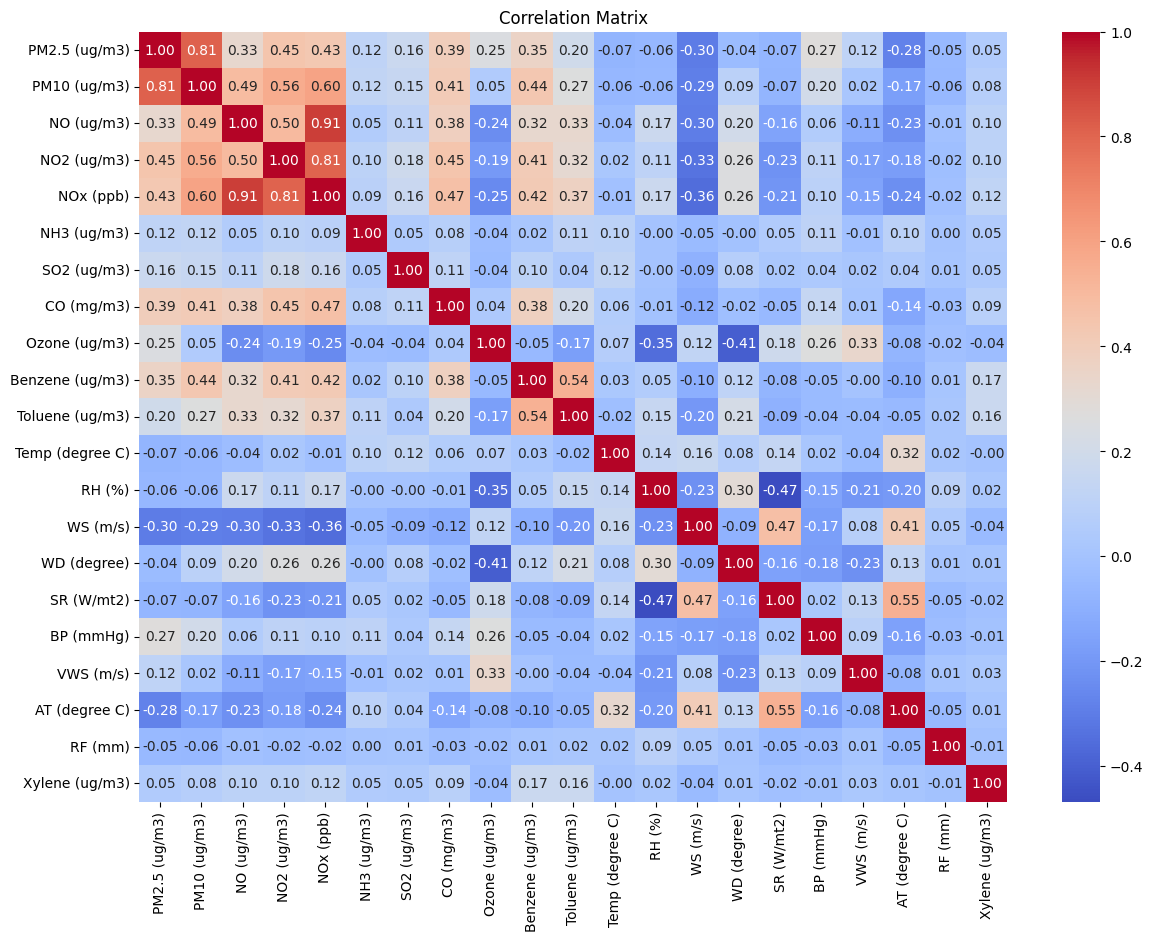

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

### Boxplot for Numerical Features

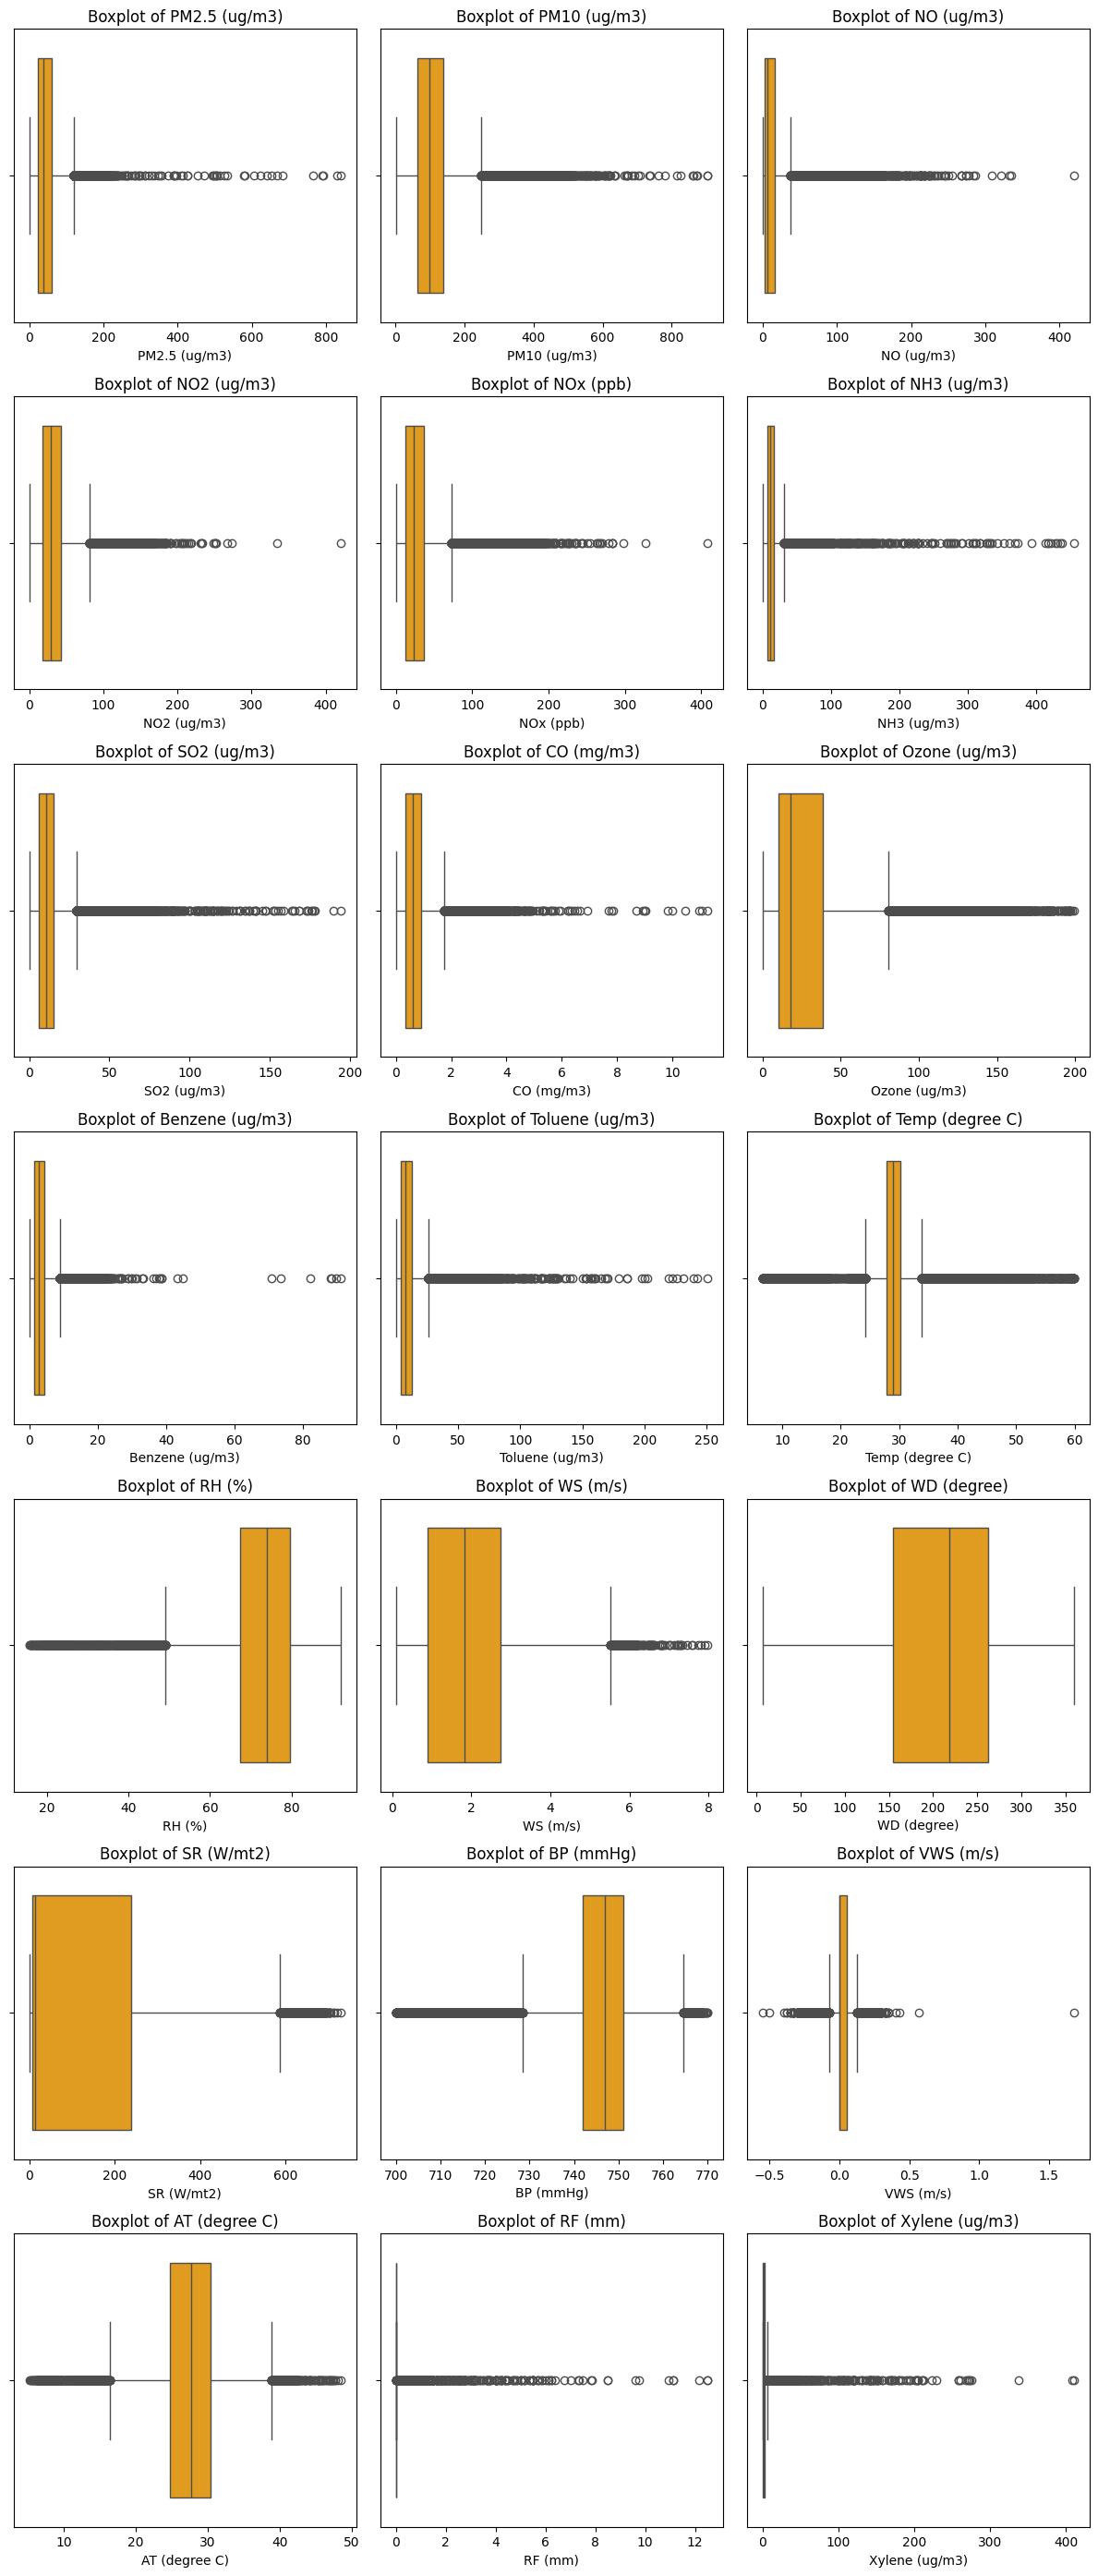

In [16]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_features = len(numerical_features)
num_rows = (num_features // 3) + (num_features % 3 > 0)

plt.figure(figsize=(12, num_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### Scalling

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Sequence Windowing

In [18]:
def create_sequences(data, window_size, target_index):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_index])
    return np.array(X), np.array(y)

window_size = 5
target_col = 'AT (degree C)'
target_index = scaled_data.columns.get_loc(target_col)

In [19]:
X, y = create_sequences(scaled_data.values, window_size, target_index)

### Split Data 80% - 10% - 10%

In [20]:
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

### Baseline LSTM Model

In [21]:
model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training Baseline LSTM

In [22]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    verbose=1)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2495 - val_loss: 0.0481
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0357 - val_loss: 0.0316
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0254 - val_loss: 0.0285
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0224 - val_loss: 0.0271
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0211 - val_loss: 0.0263
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0194 - val_loss: 0.0251
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0192 - val_loss: 0.0253
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0198 - val_loss: 0.0253
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0182 - val_loss: 0.0239
Epoch 10/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0210 - val_loss: 0.0247
Epoch 11/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0186 - val_loss: 0.0247
Epoch 12/50
1260/1260 ━━━━━━━━

### Baseline LSTM Evaluation

In [23]:
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Baseline LSTM Evaluation, MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Baseline LSTM Evaluation, MAE: 0.1097, MSE: 0.0243, R2: 0.9532


### Modified LSTM Model

In [24]:
mod_model = Sequential()
mod_model.add(LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
mod_model.add(BatchNormalization())
mod_model.add(Dropout(0.2))
mod_model.add(Dense(1, activation='linear'))
mod_model.compile(optimizer='adam', loss='mse')
mod_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           6,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,073 (27.63 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 64 (256.00 B)

### Training Modified LSTM

In [25]:
mod_history = mod_model.fit(X_train, y_train,
                            epochs=50,
                            batch_size=32,
                            validation_data=(X_val, y_val),
                            callbacks=[es],
                            verbose=1)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6128 - val_loss: 0.0609
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0946 - val_loss: 0.0333
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0701 - val_loss: 0.0324
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0651 - val_loss: 0.0268
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0606 - val_loss: 0.0256
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0586 - val_loss: 0.0259
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0583 - val_loss: 0.0256
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0579 - val_loss: 0.0261
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0581 - val_loss: 0.0269
Epoch 10/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0587 - val_loss: 0.0253
Epoch 11/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0559 - val_loss: 0.0240
Epoch 12/50
1260/1260 ━━━━━━━━

### Modified LSTM Evaluation

In [26]:
mod_pred = mod_model.predict(X_test).flatten()
mae_mod = mean_absolute_error(y_test, mod_pred)
mse_mod = mean_squared_error(y_test, mod_pred)
r2_mod = r2_score(y_test, mod_pred)
print(f"Modified LSTM Evaluation, MAE: {mae_mod:.4f}, MSE: {mse_mod:.4f}, R2: {r2_mod:.4f}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modified LSTM Evaluation, MAE: 0.1095, MSE: 0.0236, R2: 0.9546


### Plot True vs Baseline vs Modified

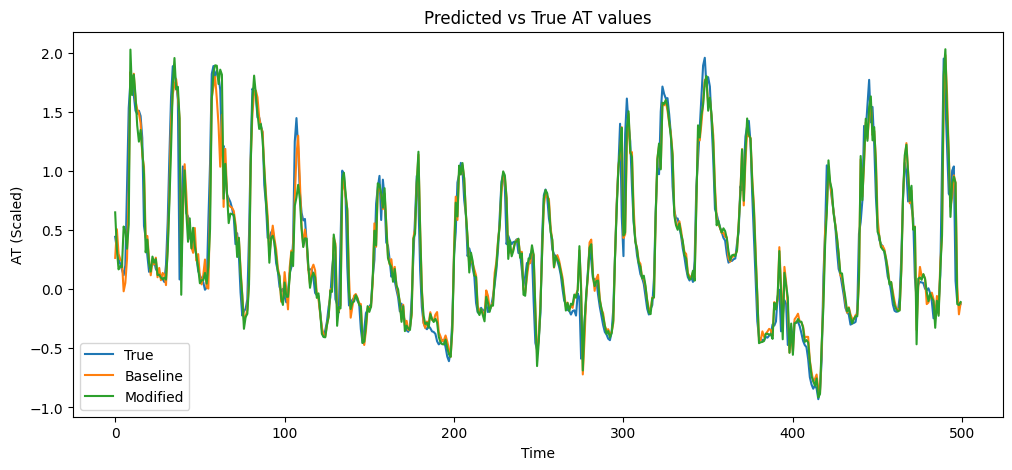

In [27]:
plt.figure(figsize=(12,5))
plt.plot(y_test[:500], label='True')
plt.plot(y_pred[:500], label='Baseline')
plt.plot(mod_pred[:500], label='Modified')
plt.legend()
plt.title("Predicted vs True AT values")
plt.xlabel("Time")
plt.ylabel("AT (Scaled)")
plt.show()

Perbedaan dari Baseline dan Modified yaitu, Baseline menggunakan 1 LSTM layer dengan 10 unit sedangkan Modified memakai 1 LSTM layer dengan 32 unit, lalu Baseline tidak ada regularization sedangkan Modified memakai Dropout dan BatchNormalization. Baseline memiliki nilai MAE 0.1097, MSE 0.0243 jika dibandingkan dengan Modified yang memiliki MAE 0.1095, MSE 0.0236 nilai Modified lebih baik dibandingkan Baseline. Lalu untuk R2 Score, Baseline memiliki 0.9532 sedangkan Modified 0.9546, dimana jika R2 mendekati 1 maka itu yang paling baik, sehingga Modified lebih baik sedikit dibandingkan Baseline. Kesimpulan yang didapat adalah Modified memiliki hasil yang lebih baik dari segi MAE, MSE, dan R2 Score dibandingkan Baseline.

### Bonus Pertanyaan

In [30]:
print("Soal: Apakah problem ini mungkin menggunakan time series multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban anda untuk problem ini?")
print("\n")
print("Jawab: Iya, masalah ini bisa dikatakan sebagai time series multivariate karena kita dapat memanfaatkan variabel-variabel yang saling berhubungan (berkorelasi) dan tercatat secara berurutan dalam waktu. Contohnya untuk memprediksi Air Temperature (AT), kita tidak hanya melihat data AT sebelumnya, tetapi juga data polusi seperti PM2.5, NO2, CO, serta faktor lain. Semua data tersebut berubah seiring waktu berjalan dan bisa memengaruhi AT. Dengan LSTM, kita dapat belajar dari pola data 5 jam sebelumnya untuk menebak nilai AT satu jam ke depan. Pendekatan ini lebih baik dibandingkan hanya melihat satu variabel, karena kita bisa mengetahui korelasi antar fitur yang berkemungkinan tidak terlihat jika dilihat sendiri")

Soal: Apakah problem ini mungkin menggunakan time series multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban anda untuk problem ini?


Jawab: Iya, masalah ini bisa dikatakan sebagai time series multivariate karena kita dapat memanfaatkan variabel-variabel yang saling berhubungan (berkorelasi) dan tercatat secara berurutan dalam waktu. Contohnya untuk memprediksi Air Temperature (AT), kita tidak hanya melihat data AT sebelumnya, tetapi juga data polusi seperti PM2.5, NO2, CO, serta faktor lain. Semua data tersebut berubah seiring waktu berjalan dan bisa memengaruhi AT. Dengan LSTM, kita dapat belajar dari pola data 5 jam sebelumnya untuk menebak nilai AT satu jam ke depan. Pendekatan ini lebih baik dibandingkan hanya melihat satu variabel, karena kita bisa mengetahui korelasi antar fitur yang berkemungkinan tidak terlihat jika dilihat sendiri


### Link Video


https://drive.google.com/file/d/1BbvQ0fKOwe_03WOCaRZplmClflipScjg/view?usp=drive_link